In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 129.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="2MNi19Tz26FuaK8valii")
project = rf.workspace("jeff-brgij").project("eppproject-xmqwk")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EPPproject-2 in yolov8:: 100%|██████████| 3406/3406 [00:00<00:00, 5862.67it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Direction of save
file_path = '/content/EPPproject-2/data.yaml'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file at {file_path} exists.")
else:
    print(f"The file at {file_path} does not exist.")

The file at /content/EPPproject-2/data.yaml exists.


In [ ]:
# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# List all files and directories in the current directory
files = os.listdir(cwd)
print(f"Files and directories in '{cwd}': {files}")


Current working directory: /content
Files and directories in '/content': ['.config', 'EPPproject-2', 'sample_data']


In [ ]:
dir_path = cwd + "/sample_data"
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")
model.info()

YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(357, 25372160, 0, 87.6134912)

In [ ]:
from ultralytics import settings

# View all settings

settings.update({'datasets_dir': '/content/EPPproject-2'})

In [ ]:
# os.chdir("/content")
# train
model.train(
    data='/content/EPPproject-2/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,  # Ajusta según tu GPU
    name="entrenamiento_placas", #change by the name of your proyect
    project="proyecto_placas" #change by the name of your proyect
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/EPPproject-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_placas, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7896b8c18170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
import os

# List of your directory
directory = "/content/proyecto_placas/entrenamiento_placas"
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio {directory} no existe.")

Archivos en el directorio:
['val_batch0_labels.jpg', 'weights', 'train_batch6752.jpg', 'BoxPR_curve.png', 'val_batch2_pred.jpg', 'val_batch0_pred.jpg', 'val_batch2_labels.jpg', 'results.png', 'labels.jpg', 'BoxP_curve.png', 'results.csv', 'train_batch0.jpg', 'BoxF1_curve.png', 'BoxR_curve.png', 'train_batch1.jpg', 'train_batch2.jpg', 'confusion_matrix.png', 'val_batch1_labels.jpg', 'train_batch6751.jpg', 'args.yaml', 'train_batch6750.jpg', 'confusion_matrix_normalized.png', 'val_batch1_pred.jpg']


In [ ]:
# Dataframe of metrics
df_metrics = pd.read_csv("/content/proyecto_placas/entrenamiento_placas/results.csv")


# Show some metrics
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   82.5849         1.41496         1.57938         1.51327   
1      2  149.5110         1.43814         1.19892         1.50696   
2      3  211.5930         1.46915         1.27410         1.55648   
3      4  274.9320         1.46468         1.26436         1.55474   
4      5  337.8440         1.46247         1.19760         1.53807   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.60090            0.66269           0.67867   
1               0.58486            0.50945           0.55664   
2               0.61654            0.51966           0.57143   
3               0.67024            0.61796           0.68390   
4               0.75654            0.71291           0.75534   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.36854       1.45053       1.62253       1.67574  0.000274   
1              0.28781       1.69691  

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3634.948049,1.058573,0.675618,1.260287,0.866018,0.862273,0.907633,0.581013,1.189477,0.669909,1.403968,0.000416,0.000416,0.000416
std,29.011492,2082.642850,0.192530,0.231654,0.124947,0.065797,0.071725,0.070210,0.069095,0.122897,0.298740,0.115191,0.000233,0.000233,0.000233
min,1.000000,82.584900,0.713370,0.350030,1.052980,0.584860,0.509450,0.556640,0.271940,1.100750,0.498570,1.331320,0.000017,0.000017,0.000017
25%,25.750000,1866.050000,0.915910,0.519238,1.165820,0.862437,0.853147,0.908023,0.569663,1.124127,0.516408,1.353215,0.000221,0.000221,0.000221
50%,50.500000,3662.225000,1.040920,0.628570,1.247035,0.888535,0.885230,0.933560,0.611460,1.136095,0.560770,1.366130,0.000417,0.000417,0.000417
75%,75.250000,5429.447500,1.185418,0.775057,1.336110,0.898790,0.900892,0.944130,0.622592,1.198740,0.677672,1.391458,0.000612,0.000612,0.000612
max,100.000000,7105.500000,1.469150,1.579380,1.556480,0.921910,0.923370,0.951080,0.631430,1.799080,2.196790,2.010930,0.000813,0.000813,0.000813


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


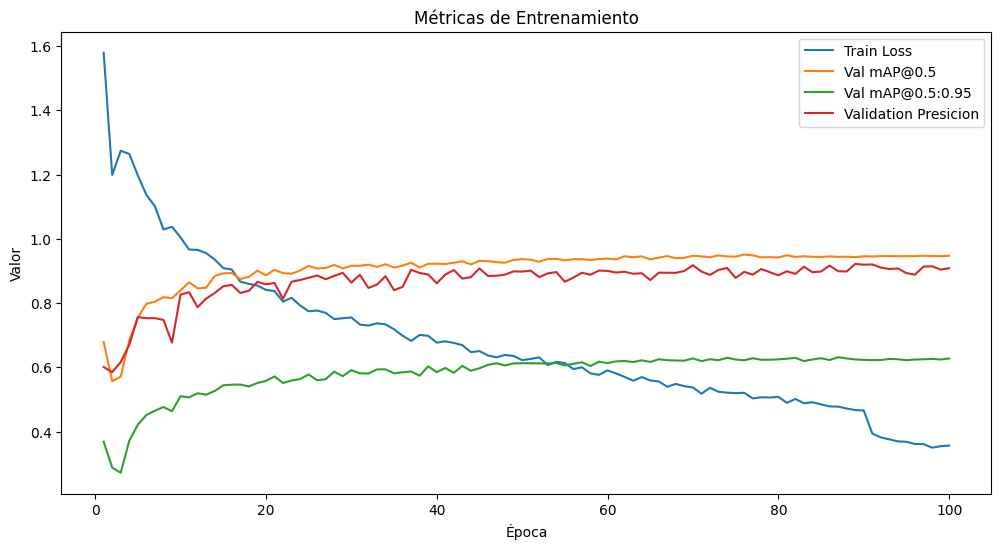

In [ ]:
print(df_metrics.columns.to_list())
# Graph
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluate model
results = model.val()

# Show Results
print(results)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,285,480 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 924.4±471.5 MB/s, size: 60.1 KB)
val: Scanning /content/EPPproject-2/valid/labels.cache... 340 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 340/340 686.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 1.5it/s 14.6s
                   all        340       2206      0.899       0.91      0.944      0.631
                  blue         67        113      0.929       0.92      0.957      0.647
                 glass         64         92      0.782       0.82      0.847      0.496
                  head         35        147        0.9      0.871      0.945      0.621
                person        337        890      0.936      0.942      0.958      0.696
                   red         50     

In [ ]:
# Load the model
# modelo_entrenado = YOLO("/content/yolov8n.pt")
modelo_entrenado = YOLO("/content/proyecto_placas/entrenamiento_placas/weights/best.pt")

# Realizar inferencia en una imagen
resultados = modelo_entrenado.predict(source="/content/eppimagen1.jpg", save=True)

# Access
for resultado in resultados:
    print(f"Predicciones para la imagen: {resultado.path}")

    for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")


image 1/1 /content/eppimagen1.jpg: 640x480 2 persons, 2 vests, 2 whites, 61.1ms
Speed: 2.4ms preprocess, 61.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict
Predicciones para la imagen: /content/eppimagen1.jpg
Bounding Box: tensor([471.6348, 207.5215, 747.6529, 983.4824], device='cuda:0') - Confianza: 0.9098409414291382 - Clase: 3.0
Bounding Box: tensor([164.0012, 207.8601, 421.5111, 963.0072], device='cuda:0') - Confianza: 0.9091500043869019 - Clase: 3.0
Bounding Box: tensor([479.1097, 339.2905, 738.1915, 660.8103], device='cuda:0') - Confianza: 0.8971150517463684 - Clase: 5.0
Bounding Box: tensor([169.4756, 301.8360, 412.5783, 556.9361], device='cuda:0') - Confianza: 0.8948672413825989 - Clase: 5.0
Bounding Box: tensor([240.8747, 208.3119, 340.1340, 289.9214], device='cuda:0') - Confianza: 0.870387613773346 - Clase: 6.0
Bounding Box: tensor([549.9377, 212.8858, 674.2179, 306.3539], device='cuda:0') - Confianza: 0.3669

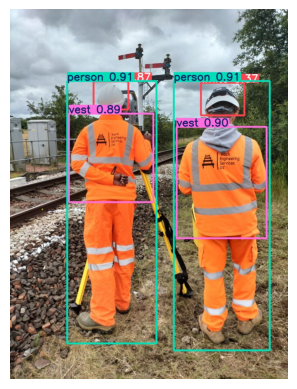

In [ ]:
# Load and Show
img = Image.open("/content/runs/detect/predict/eppimagen1.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import shutil
from google.colab import files

#Specify the name of the folder you want to compress and download.

folder_path = "/content/proyecto_placas"  # Folder path in Colab
output_filename = "jeffeppV1.zip"   # Output zip file name

 #Compress the folder into a ZIP file
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Download the ZIP file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>